In [16]:
from pydriller import Repository, Git
import json
import glob
import lizard
import pandas as pd

In [2]:
def get_all_java_files(path):
    """
    Get all java files in a given directory.
    :param path: path of the directory
    :return: a list of java files
    """
    return glob.glob(path + "/**/*.java", recursive=True)

In [3]:
def get_cyclomatic_complexity(file_list):
    """
    Get the cyclomatic complexity of each entity in a given list.
    :param l: list of entities
    :return: a list of tuples (entity, cyclomatic complexity)
    """
    result = {}
    for file in file_list:
        result[file.split("\\")[-1]] = lizard.analyze_file(file).average_cyclomatic_complexity
        print(f"File {file.split("\\")[-1]} has cyclomatic complexity {result[file.split('\\')[-1]]}")
    return result

In [4]:
def get_lines_of_code(file_list):
    """
    Get the lines of code of each entity in a given list.
    :param l: list of entities
    :return: a list of tuples (entity, lines of code)
    """
    result = {}
    for file in file_list:
        result[file.split("\\")[-1]] = lizard.analyze_file(file).nloc
        print(f"File {file.split('\\')[-1]} has {result[file.split('\\')[-1]]} lines of code")
    return result

In [5]:
def get_indentation_based_complexity(file_list):
    """
    Get the indentation based complexity of each entity in a given list.
    :param l: list of entities
    :return: a list of tuples (entity, indentation based complexity)
    """
    result = {}
    for file in file_list:
        result[file.split("\\")[-1]] = compute_indentation_based_complexity(file)
        print(f"File {file.split('\\')[-1]} has indentation based complexity {result[file.split('\\')[-1]]}")
    return result

In [6]:
def compute_indentation_based_complexity(file):
    with open(file, "r", encoding="utf8") as f:
        lines = f.readlines()
    indentation_based_complexity = 0
    for line in lines:
        indentation_based_complexity += line.count("    ")
    return indentation_based_complexity

In [7]:
def get_number_of_code_changes(json):
    """
    Get the number of code changes of each entity in a given list.
    :param l: list of entities
    :return: a list of tuples (entity, number of code changes)
    """
    result = {}
    for file in json:
        if not file.endswith(".java"):
            continue
        result[file.split("\\")[-1]] = json[file]["num of revisions"]
        print(f"File {file.split('\\')[-1]} has {result[file.split('\\')[-1]]} number of code changes")
    return result

In [8]:
path = "./kafka"
java_files = get_all_java_files(path)

In [9]:
cyclcomatic_complexity = get_cyclomatic_complexity(java_files)
json_ = json.load(open("ex_1_result.json", "r"))
number_of_code_changes = get_number_of_code_changes(json_)

File ApiVersions.java has cyclomatic complexity 1.0
File ClientDnsLookup.java has cyclomatic complexity 1.0
File ClientRequest.java has cyclomatic complexity 1.0
File ClientResponse.java has cyclomatic complexity 1.2142857142857142
File ClientUtils.java has cyclomatic complexity 2.5454545454545454
File ClusterConnectionStates.java has cyclomatic complexity 1.8717948717948718
File CommonClientConfigs.java has cyclomatic complexity 2.6
File ConnectionState.java has cyclomatic complexity 2.0
File DefaultHostResolver.java has cyclomatic complexity 1.0
File FetchSessionHandler.java has cyclomatic complexity 3.185185185185185
File GroupRebalanceConfig.java has cyclomatic complexity 2.3333333333333335
File HostResolver.java has cyclomatic complexity 0
File InFlightRequests.java has cyclomatic complexity 2.0714285714285716
File KafkaClient.java has cyclomatic complexity 0
File ManualMetadataUpdater.java has cyclomatic complexity 1.0
File Metadata.java has cyclomatic complexity 2.0
File Metadat

In [10]:
lines_of_code = get_lines_of_code(java_files)
indentation_based_complexity = get_indentation_based_complexity(java_files)

File ApiVersions.java has 33 lines of code
File ClientDnsLookup.java has 17 lines of code
File ClientRequest.java has 77 lines of code
File ClientResponse.java has 109 lines of code
File ClientUtils.java has 208 lines of code
File ClusterConnectionStates.java has 283 lines of code
File CommonClientConfigs.java has 175 lines of code
File ConnectionState.java has 10 lines of code
File DefaultHostResolver.java has 9 lines of code
File FetchSessionHandler.java has 404 lines of code
File GroupRebalanceConfig.java has 64 lines of code
File HostResolver.java has 6 lines of code
File InFlightRequests.java has 96 lines of code
File KafkaClient.java has 35 lines of code
File ManualMetadataUpdater.java has 45 lines of code
File Metadata.java has 396 lines of code
File MetadataCache.java has 161 lines of code
File MetadataUpdater.java has 20 lines of code
File NetworkClient.java has 924 lines of code
File NetworkClientUtils.java has 58 lines of code
File NodeApiVersions.java has 151 lines of code


In [11]:
def draw_heatmap(data, title):
    """
    Draw a heatmap of the given data.
    :param data: data to be plotted
    :param title: title of the plot
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    sns.heatmap(data, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu")
    plt.title(title)
    plt.show()

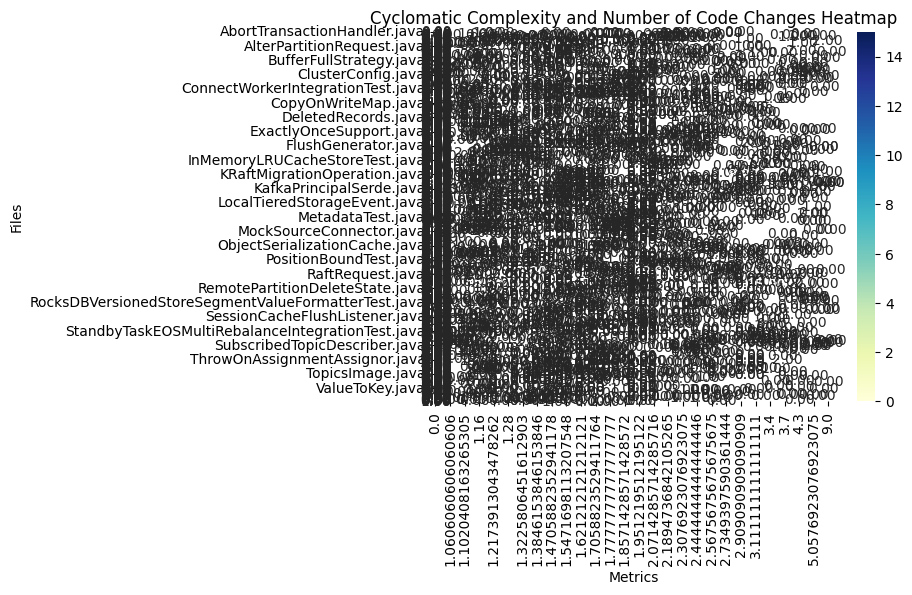

In [26]:
# Convert dictionaries to Pandas DataFrames
complexity_df = pd.DataFrame(list(cyclcomatic_complexity.items()), columns=['File', 'Cyclomatic Complexity'])
changes_df = pd.DataFrame(list(number_of_code_changes.items()), columns=['File', 'Number of Code Changes'])

# Merge DataFrames on the 'File' column
merged_df = pd.merge(complexity_df, changes_df, on='File')

# Pivot the DataFrame for heatmap
heatmap_data = merged_df.pivot(index='File', columns='Cyclomatic Complexity', values='Number of Code Changes')

# Create a heatmap using Seaborn
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)

# Set labels and title
plt.xlabel("Metrics")
plt.ylabel("Files")
plt.title("Cyclomatic Complexity and Number of Code Changes Heatmap")

# Display the plot
plt.show()

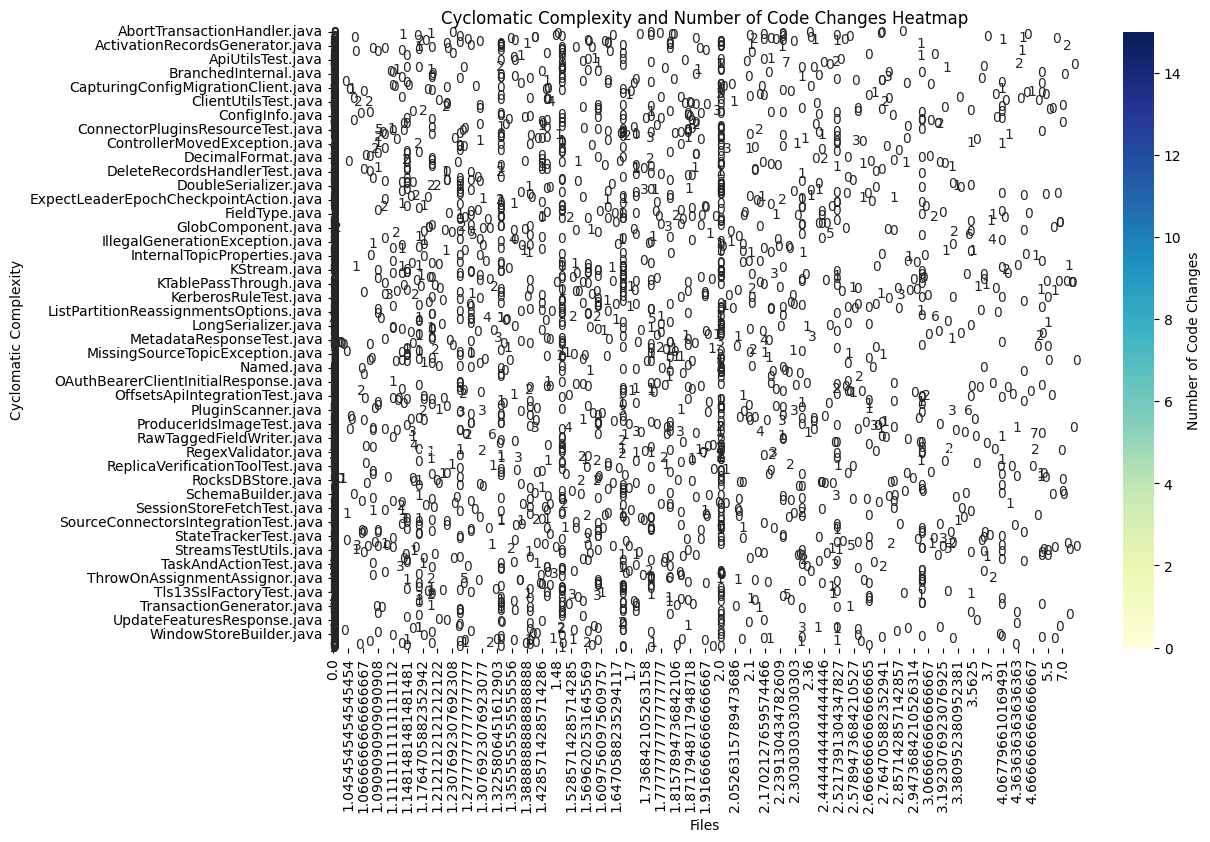

In [28]:
# Convert dictionaries to Pandas DataFrames
complexity_df = pd.DataFrame(list(cyclcomatic_complexity.items()), columns=['File', 'Cyclomatic Complexity'])
changes_df = pd.DataFrame(list(number_of_code_changes.items()), columns=['File', 'Number of Code Changes'])

# Merge DataFrames on the 'File' column
merged_df = pd.merge(complexity_df, changes_df, on='File')

# Pivot the DataFrame for heatmap
heatmap_data = merged_df.pivot(index='File', columns='Cyclomatic Complexity', values='Number of Code Changes')

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn with improved aesthetics
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Number of Code Changes'})

# Set labels and title
plt.xlabel("Files")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity and Number of Code Changes Heatmap")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

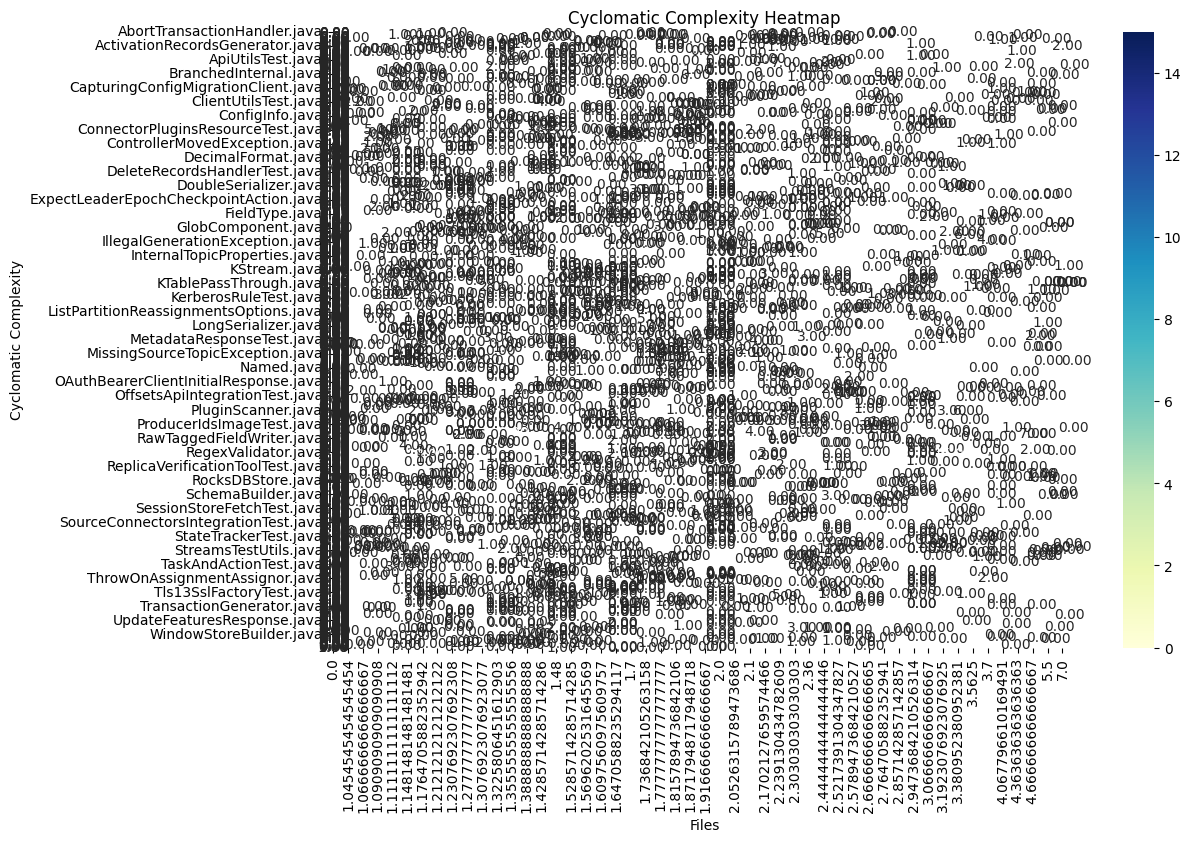

In [31]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(list(cyclcomatic_complexity.items()), columns=['File', 'Cyclomatic Complexity'])

# Pivot the DataFrame for Seaborn heatmap
#heatmap_data = df.pivot(index=None, columns='File', values='Cyclomatic Complexity')

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Set labels and title
plt.xlabel("Files")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Heatmap")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()